In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df=pd.read_excel("Book1.xlsx")

In [39]:
df.head()

,Amount_of_Algae,Initial_Concentration,Absorbance,PPM,Contact_time,PH,Removal Effeciency
0,0.5,1000,0.48,865.459118,30,4,0.134541
1,1.0,1000,0.42,739.450043,30,4,0.260550
2,2.0,1000,0.40,697.447018,30,4,0.302553
3,3.0,1000,0.37,634.442480,30,4,0.365558
4,4.0,1000,0.32,529.434918,30,4,0.470565


In [40]:
df.corr()


,Amount_of_Algae,Initial_Concentration,Absorbance,PPM,Contact_time,PH,Removal Effeciency
Amount_of_Algae,1.000000e+00,2.482566e-16,-0.397296,-0.397490,-9.535994e-17,-6.049624e-17,0.722119
Initial_Concentration,2.482566e-16,1.000000e+00,0.847040,0.846818,4.473894e-17,-4.392901e-16,-0.366453
Absorbance,-3.972962e-01,8.470401e-01,1.000000,0.999994,-1.953207e-01,3.876443e-02,-0.742727
PPM,-3.974898e-01,8.468177e-01,0.999994,1.000000,-1.958065e-01,3.851217e-02,-0.742954
Contact_time,-9.535994e-17,4.473894e-17,-0.195321,-0.195806,1.000000e+00,2.990923e-16,0.358877
PH,-6.049624e-17,-4.392901e-16,0.038764,0.038512,2.990923e-16,1.000000e+00,0.100913
Removal Effeciency,7.221190e-01,-3.664528e-01,-0.742727,-0.742954,3.588767e-01,1.009134e-01,1.000000


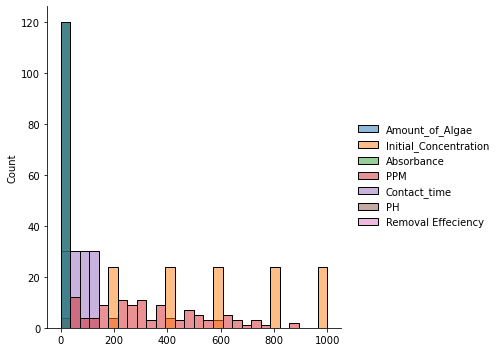

In [41]:
import seaborn as sns
sns.displot(df)

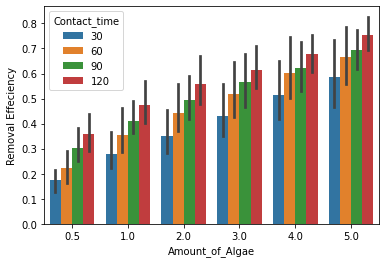

In [42]:
sns.barplot(x='Amount_of_Algae',y='Removal Effeciency', data=df, 
            hue='Contact_time')
plt.show()

C:\Users\dell3\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


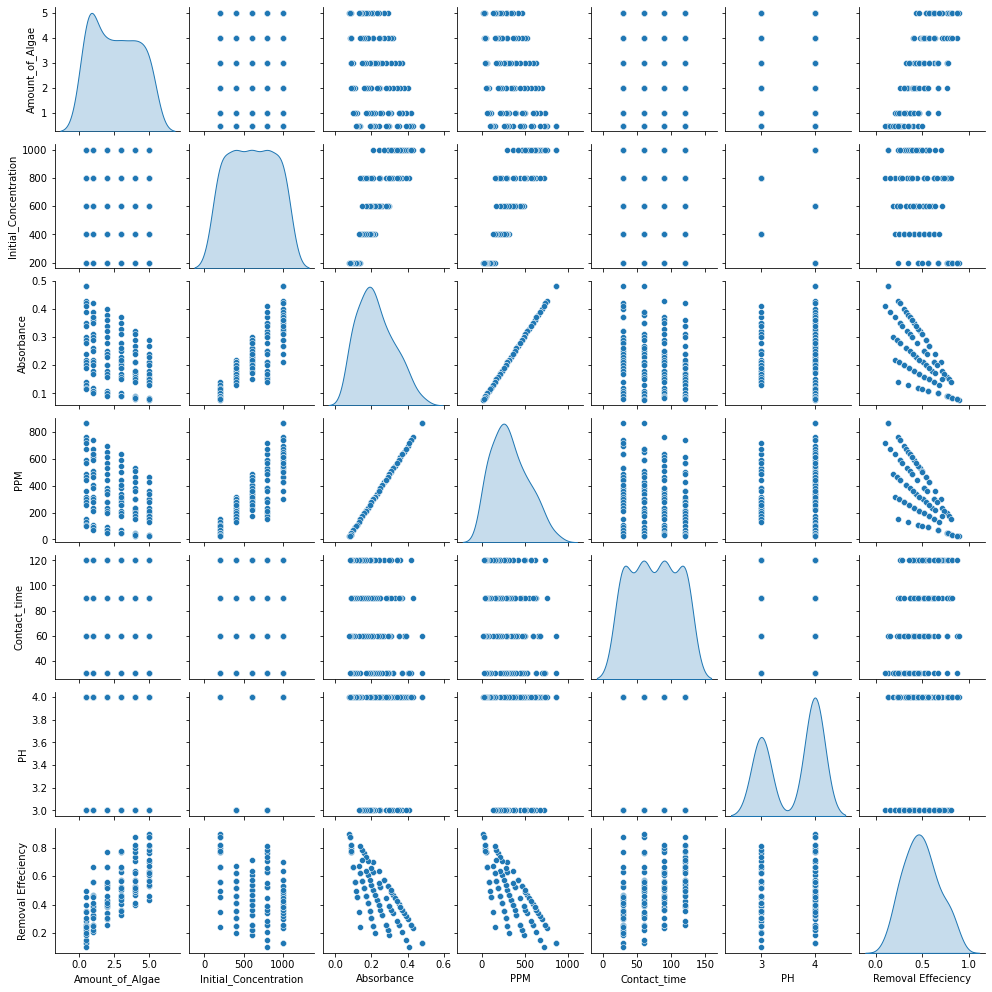

In [43]:
sns.pairplot(df,size=2,diag_kind='kde')

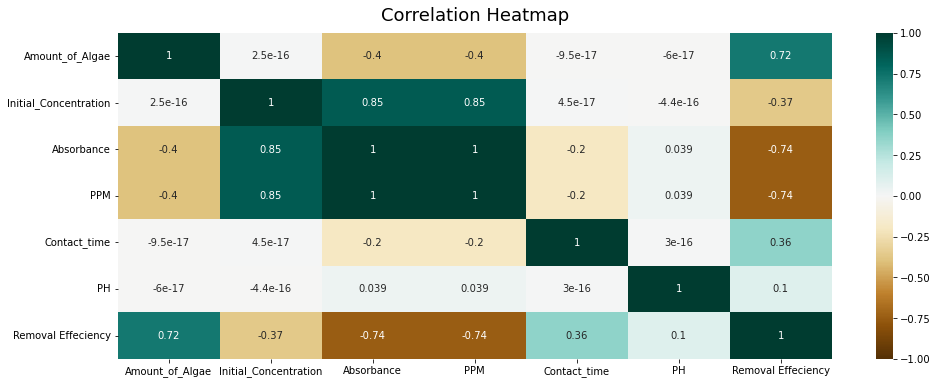

In [7]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [8]:
df.describe()

,Amount_of_Algae,Initial_Concentration,Absorbance,PPM,Contact_time,PH,Removal Effeciency
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.583333,600.000000,0.223850,327.438681,75.000000,3.600000,0.486486
std,1.598757,284.028641,0.099059,207.981286,33.681653,0.491952,0.187282
min,0.500000,200.000000,0.078000,21.198316,30.000000,3.000000,0.101939
25%,1.000000,400.000000,0.150000,172.409206,52.500000,3.000000,0.356214
50%,2.500000,600.000000,0.210000,298.418281,75.000000,4.000000,0.467634
75%,4.000000,800.000000,0.290000,466.430381,97.500000,4.000000,0.622855
max,5.000000,1000.000000,0.480000,865.459118,120.000000,4.000000,0.894008


In [9]:
x=df.iloc[:,:6]
y=df.iloc[:,6]

In [10]:
x

,Amount_of_Algae,Initial_Concentration,Absorbance,PPM,Contact_time,PH
0,0.5,1000,0.480,865.459118,30,4
1,1.0,1000,0.420,739.450043,30,4
2,2.0,1000,0.400,697.447018,30,4
3,3.0,1000,0.370,634.442480,30,4
4,4.0,1000,0.320,529.434918,30,4
...,...,...,...,...,...,...
115,1.0,200,0.100,67.401644,120,4
116,2.0,200,0.090,46.400131,120,4
117,3.0,200,0.089,44.299980,120,4
118,4.0,200,0.085,35.899375,120,4


In [11]:
y

0      0.134541
1      0.260550
2      0.302553
3      0.365558
4      0.470565
         ...   
115    0.662992
116    0.767999
117    0.778500
118    0.820503
119    0.873007
Name: Removal Effeciency, Length: 120, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [13]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [14]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

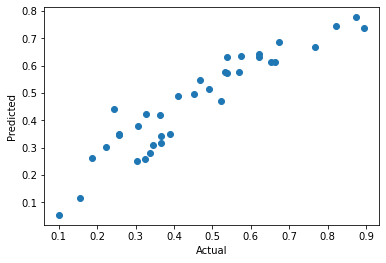

In [15]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [16]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [17]:
pred_df

,Actual Value,Predicted Value,Difference
48,0.187614,0.261543,-0.073929
94,0.621481,0.631283,-0.009802
95,0.673985,0.684896,-0.010911
8,0.344556,0.310930,0.033626
97,0.452977,0.495905,-0.042928
22,0.575573,0.636109,-0.060536
7,0.323554,0.257316,0.066238
10,0.491567,0.514649,-0.023083
45,0.653229,0.611349,0.041881
89,0.621481,0.643465,-0.021984


In [18]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (84, 6)
X_test: (36, 6)
Y_train: (84,)
Y_test: (36,)


#To train the model, we have to import the Linear Regression model, which we have already created at the beginning. Use the fit method, and pass the training sets into it to train the model.

In [21]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 86.57


# ACCURACY OF LINEAR REGRESSION MODEL IS 86.57

In [50]:
import tensorflow as tf

In [60]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Here we have used StandardScalar class from the sklearn library in order to perform standardization.

Now we have completed our feature engineering phase. We can now start with the creation of our artificial neural network from the next point onwards.

In [61]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [62]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

Here we have created our first hidden layer by using the Dense class which is part of the layers module. This class accepts 2 inputs:-

1. units:- number of neurons that will be present in the respective layer

2. activation:- specify which activation function to be used

For the first input, I had tested with many values in the past and the optimal value that I had found is 6. Obviously, we can try with any other value as there is no hard rule about the number of neurons that should be present in the layer.

For the second input, we are always going to use “relu”[rectified linear unit] as an activation function for hidden layers. Since we are going to create two hidden layers, this same step we are going to repeat for the creation of the second hidden layer as well.

In [63]:
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [64]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [65]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

1. optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent. I had experimented with various optimizers like RMSProp, adam and I have found that adam optimizer is a reliable one that can be used with any neural network.


2. loss:- specifies which loss function should be used. For binary classification, the value should be binary_crossentropy. For multiclass classification, it should be categorical_crossentropy.


3. metrics:- which performance metrics to be used in order to compute performance. Here we have used accuracy as a performance metric

In [66]:
#Fitting ANN
ann.fit(x_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 2ms/step - loss: 0.7481 - accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7413 - accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7344 - accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7239 - accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7198 - accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7146 - accuracy: 0.0000e+00
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7099 - accuracy: 0.0000e+00
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.0000e+00
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 